In [2]:
%load_ext watermark
%watermark

2020-08-17T11:40:17-04:00

CPython 3.7.7
IPython 7.17.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 12
interpreter: 64bit


In [3]:
# Import Libraries
# -------------------

# pandas
import pandas as pd

#logging 
import logging
logging.basicConfig(format='%(messages)s', level=logging.INFO, stream=sys.stdout)

# matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from titanic import data, models

In [9]:
raw_data_file = '../data/titanic.csv'
df = pd.read_csv(raw_data_file, usecols=['Name', 'Sex', 'Age', 'Survived'])
print('DataFrame shape: {}'.format(df.shape))
df.head()

DataFrame shape: (891, 4)


,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


# data cleaning

In [10]:
# percentage of missing data in each columns
pd.DataFrame(
    df.isnull().sum() / len(df),
    columns=['% Missing Values']
).transpose()

,Survived,Name,Sex,Age
% Missing Values,0.0,0.0,0.0,0.198653


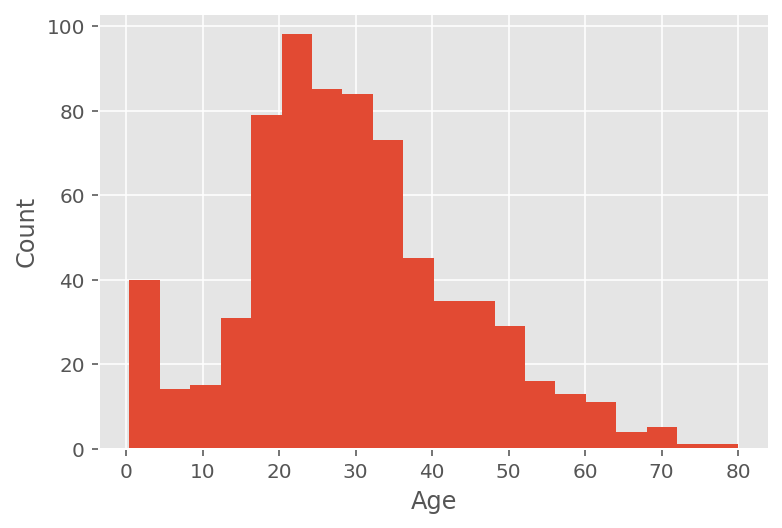

In [11]:
# age histogram
df.Age.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
df = df.fillna({'Age': df.Age.median()})
df.head()

,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


In [13]:
df = df.astype({
    'Age': 'float64',
    'Name': 'object',
    'Sex': 'category',
    'Survived': 'int64'
})

# Feature engineering

In [14]:
# Extract the title from the name


# Extract the Title from the name

simplify_title = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}

df['Title'] = df['Name'].apply(
    lambda full_name: (
        simplify_title[full_name.split(',')[1].split('.')[0].strip()]
    )
)

df['Title'] = df['Title'].astype('category')
df.head()

,Survived,Name,Sex,Age,Title
0,0,"Braund, Mr. Owen Harris",male,22.0,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Mrs
2,1,"Heikkinen, Miss. Laina",female,26.0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Mrs
4,0,"Allen, Mr. William Henry",male,35.0,Mr


## refactored

In [ ]:
df = data.extract_title(df)
df.head()

# prediction

In [15]:
df = df[['Age', 'Sex', 'Title', 'Survived']]

# One-hot encoding of categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Title'])

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1).values,
    df['Survived'].values,
    test_size=0.2,
    random_state=0
)

In [16]:
# Mjority vote classifier
majority_vote = round(y_train.mean())
y_test_predictions = [majority_vote] * len(y_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_predictions)
print('The prediction accuracy with the majority vote classifier is {:.1f}%'.format(accuracy * 100))

The prediction accuracy with the majority vote classifier is 61.5%


In [17]:
# Ridge logistic regression
lr = LogisticRegression(random_state=0, solver='lbfgs')

param_range = [2 ** x for x in range(-10, 10)]

gs = GridSearchCV(
    estimator=lr,
    param_grid={'C': param_range},
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

gs.fit(X_train, y_train)

accuracy = accuracy_score(y_true=y_test, y_pred=gs.predict(X_test))

print('The prediction accuracy with the ridge logistic regression classifier is {:.1f}%'.format(accuracy * 100))

The prediction accuracy with the ridge logistic regression classifier is 78.2%


/Users/zz/Documents/data/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


refactored model

In [ ]:
X_train, X_test, y_train, y_test = models.data_preparation(df, test_size=0.2, random_state=42)

In [ ]:
model.run_majority_vote(X_train, X_test, y_train, y_test)

In [ ]:
moedl.run_lr(X_train, X_test, y_train, y_test)